In [26]:
#module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#data processing
dataframe = pd.read_csv('train.csv',header=None)
data = dataframe.iloc[:,[0,2]].values
data = data[data[:,1]>0]
x = data[:,0]
y = np.log2(data[:,1])


In [28]:
x.shape[0]

83

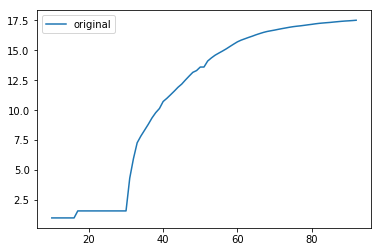

In [29]:
#original data plot
plt.plot(x,y,label='original')
plt.legend()
plt.show()

In [30]:
#do not touch this function
def kernel_matrix_generator(x):
    kernel_matrix = np.zeros(shape=(x.shape[0],x.shape[0]))
    i=0
    for x_i in x:
        j=0
        for x_j in x:
            kernel_matrix[i,j] = kernel_formula(x_i,x_j)
            j+=1
        i+=1
    return kernel_matrix

#do not touch this function
def solver(x,y,gamma):
    kernel_matrix = kernel_matrix_generator(x)
    A = gamma*(kernel_matrix.shape[0])*np.identity(kernel_matrix.shape[0])
    A = np.add(A,kernel_matrix)
    B=y
    c = np.linalg.solve(A,B)
    return c

#do not touch this function
def predictor(x_train,x_test,y_train,gamma):
    c = solver(x_train,y_train,gamma)
    output = np.zeros(shape=(x_test.shape[0]))
    for j in range(x_test.shape[0]):
        for i in range(x_train.shape[0]):
            output[j]+=c[i]*kernel_formula(x_train[i],x_test[j])
    return output

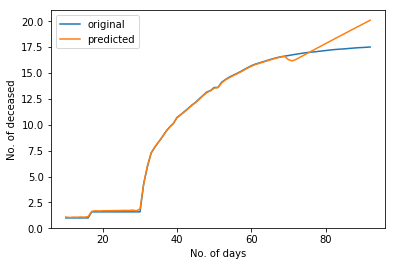

In [31]:
def kernel_formula(x_i,x_j):
    
    #for the gaussian kernel uncomment it
    '''
    sigma = 2
    gaussian = np.exp(-np.square(np.linalg.norm(x_i-x_j))/(2*sigma*sigma))
    return gaussian
    '''
    
    #for kernel in sir's paper
    
    w_1 = 0.852
    w_2 = 10
    w_3 = 0.64
    return np.power(x_i*x_j,w_1)+w_2*np.exp(-w_3*np.square(x_i-x_j))
    
    
    #sigmoid kernel
    '''
    w_1 = 0.00000002
    w_2 = 0.002
    return np.tanh(w_1*x_i*x_j+w_2)
    '''
    
    
    #sigmoid + gaussian
    '''
    sigma = 2
    w_1 = 0.0000002
    w_2 = 0.002
    return np.exp(-np.square(np.linalg.norm(x_i-x_j))/(2*sigma*sigma)) + np.tanh(w_1*x_i*x_j+w_2)
    '''
    
    #gaussian
    '''
    w_2 = 1.5
    w_3 = 0.1
    return w_2*np.exp(-w_3*np.square(x_i-x_j))
    '''
    
    
    #gaussian + sigmoid
    '''
    w_1 = 0.0002
    b = 2000
    w_2 = 0.8
    w_3 = 0.1
    return w_2*np.exp(-w_3*np.square(x_i-x_j))+(1-w_2)*np.tanh(w_1*x_i*x_j+b)
    '''
    
    #exponential
    '''
    a = 500
    r = abs(x_i-x_j)
    b = -0.1
    return a*np.exp(b*r)
    '''


#plot for both predicted and original curve
#def predictor(x_train,x_test,y_train,gamma): 
#x[:60] - training for 59 days
preds = predictor(x[:60],x,y[:60],0.01) #change the gamma value here - regularization parameter

plt.plot(x,y,label='original')
plt.plot(x,preds,label='predicted')
plt.legend()
plt.xlabel('No. of days')
plt.ylabel('No. of deceased')
plt.show()